In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('index.csv')
print(df)


            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70                Latte  
1     38.70      

In [40]:
#Data Summary
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB
None
             money
count  1133.000000
mean     33.105808
std       5.035366
min      18.120000
25%      28.900000
50%      32.820000
75%      37.720000
max      40.000000


In [2]:
#Searching for missing values 
print(df.isnull().sum())

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [3]:
# Fill missing values in 'card' column with a default value, e.g., 'No Card'
df['card'] = df['card'].fillna('No Card')
print(df)

            date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70                Latte  
1     38.70      

In [4]:
# Convert 'date' and 'datetime' columns to datetime format
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
# Creating columns for Month, Weekdays, and Hours in the dataframe 'df'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%Y-%m')
df['day'] = df['date'].dt.strftime('%w')
df['hour'] = df['datetime'].dt.strftime('%H')

# Finding the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

print("Minimum Date:", min_date)
print("Maximum Date:", max_date)

# Drop the original date column
df.drop(columns=['date'], inplace=True)

# Display the updated dataframe information
print(df.info())

Minimum Date: 2024-03-01 00:00:00
Maximum Date: 2024-07-31 00:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     1133 non-null   datetime64[ns]
 1   cash_type    1133 non-null   object        
 2   card         1133 non-null   object        
 3   money        1133 non-null   float64       
 4   coffee_name  1133 non-null   object        
 5   year         1133 non-null   int32         
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 75.4+ KB
None


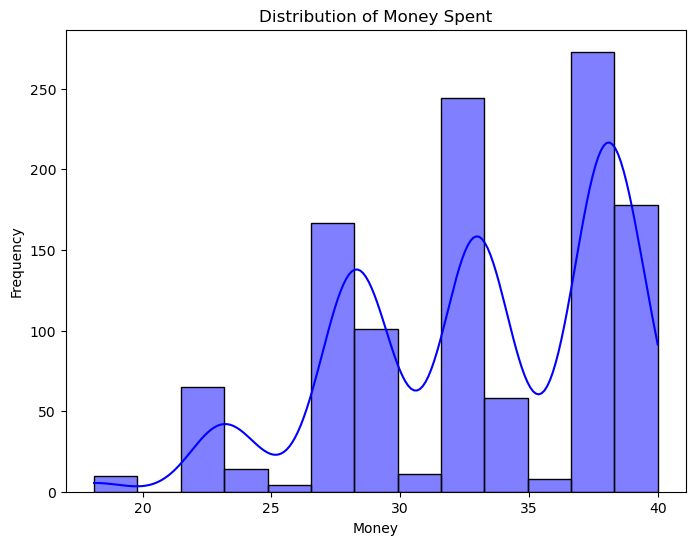

In [16]:
#Distribution of Money Spent
plt.figure(figsize=(8, 6))
sns.histplot(df['money'], kde=True, color='blue')
plt.title('Distribution of Money Spent')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()


Insights:
1. Most common money amounts: Around 26, 31, and 39.
2. Least common money amounts: Around 22, 29, and 35.
3. People frequently spend around 26, 31, and 39 units.
4. Less common spending around 22, 29, and 35 units

Recommendations:
1. Optimize Pricing: Price products around 26, 31, and 39 units to match common spending habits.
2. Promote Less Common Amounts: Offer discounts for spending around 22, 29, and 35 units.
3. Bundle Products: Create bundles priced at 26, 31, and 39 units to attract more customers.

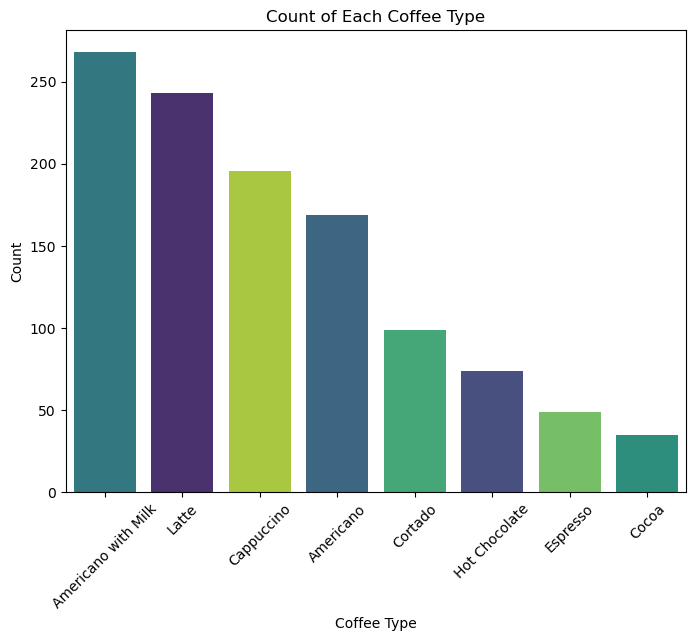

In [22]:
# Count of Each Coffee Type
# Count occurrences of each coffee type and sort by count
coffee_counts = df['coffee_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.countplot(x='coffee_name', hue='coffee_name', order=coffee_counts.index, data=df, palette='viridis', legend=False)
plt.title('Count of Each Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insights:
1. Americano with Milk is the most popular drink.
2. Latte and Cappuccino are also very popular.
3. Americano and Mocha have moderate popularity.
4. Espresso and Cocoa are the least popular.

Recommendations:
1. Stock and promote popular drinks like Americano with Milk, Latte, and Cappuccino.
2. Boost moderate popularity drinks with promotions for Americano and Mocha.
3. Evaluate less popular drinks like Espresso and Cocoa for potential changes.


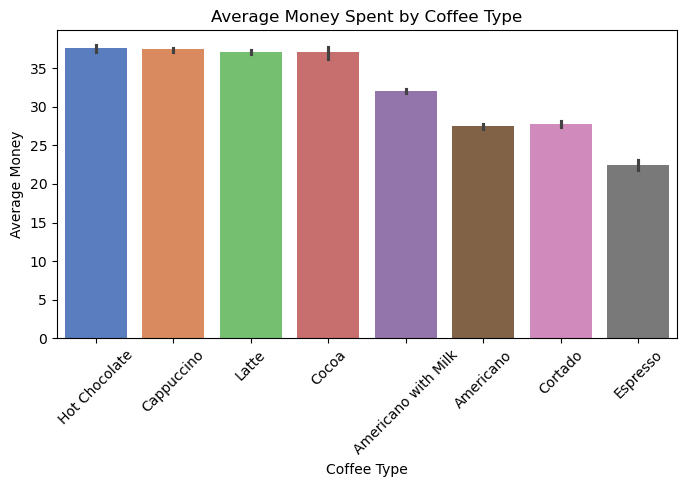

In [6]:
#Barplot of Money Spent by Coffee Type
# Sort the DataFrame by 'money' values in descending order
df_sorted = df.sort_values(by='money', ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='coffee_name', y='money', hue='coffee_name', data=df_sorted, palette='muted', dodge=False)
plt.title('Average Money Spent by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Money')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.show()


Insights:
1. Hot Chocolate has the highest average spending.
2. Espresso has the lowest average spending.
3. Cappuccino and Latte have similar average spending.
4. Variability in spending is higher for Hot Chocolate and Latte compared to Espresso and Cortado.

Recommendations:
1. Promote high-spending items like Hot Chocolate, Cappuccino, and Latte.
2. Budget-friendly options: Consider Espresso or Cortado.
3. Investigate spending variability for Hot Chocolate and Latte.
4. Introduce new variations of popular items.


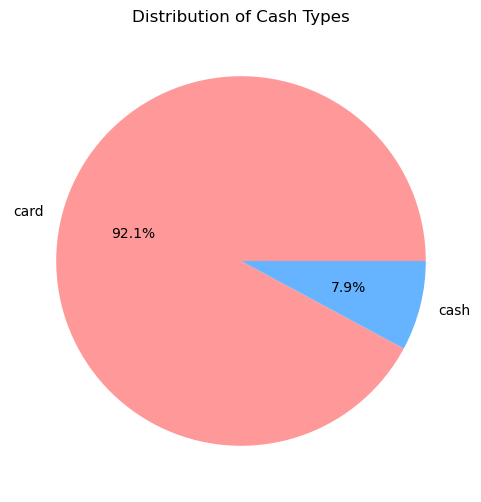

In [28]:
#Count of Cash_Type

# Count occurrences of each cash type
cash_counts = df['cash_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(cash_counts, labels=cash_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Cash Types')
plt.show()



Insights:
1. Card Transactions: 92.1% of transactions are made using card, showing a strong preference for cashless payments.
2. Cash Transactions: Only 7.9% of transactions are made using cash.

Recommendations for Better ROI:
1. Discounts for Cashless Transactions: Encourage card payments.
2. Loyalty Programs: Offer rewards for repeat cashless transactions.
3. Bundled Offers: Discounts for multiple items paid with a card.
4. Mobile Payments: Accept Apple Pay, Google Pay, etc.
5. Seasonal Promotions: Extra discounts during holidays.
6. Promote Convenience: Highlight the ease of cashless payments.


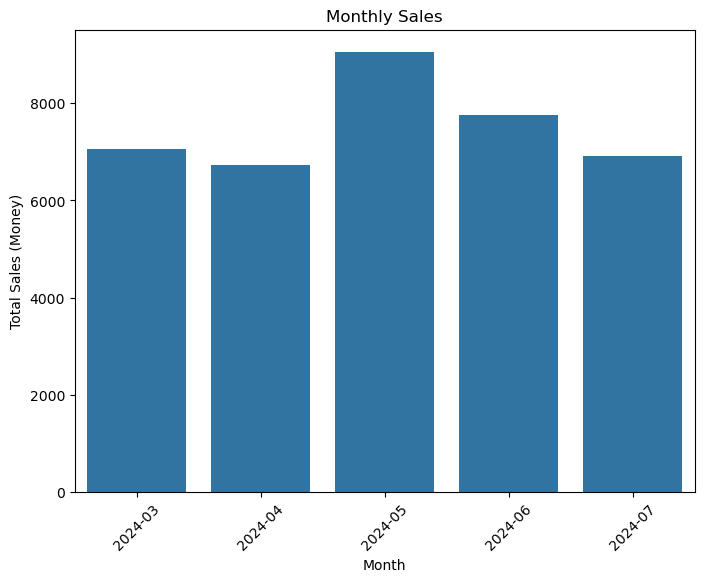

In [12]:
#Monthly Sales
# Assuming 'df' is your dataframe
# Grouping and summing the sales by month
monthly_sales = df.groupby('month')['money'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='money', data=monthly_sales)
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.show()

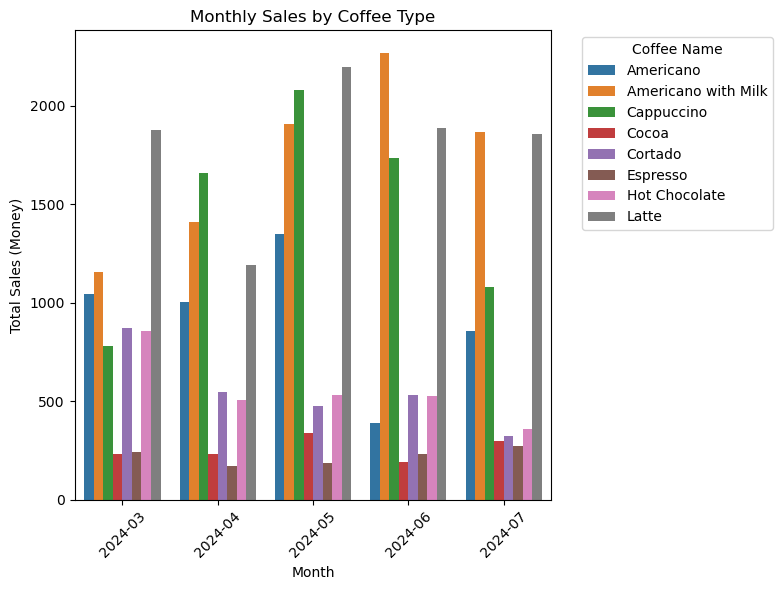

In [10]:
#Monthly Sales by coffee_name
# Grouping and summing the sales by month and coffee type
monthly_sales = df.groupby(['month', 'coffee_name'])['money'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='money', hue='coffee_name', data=monthly_sales)
plt.title('Monthly Sales by Coffee Type')
plt.xlabel('Month')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


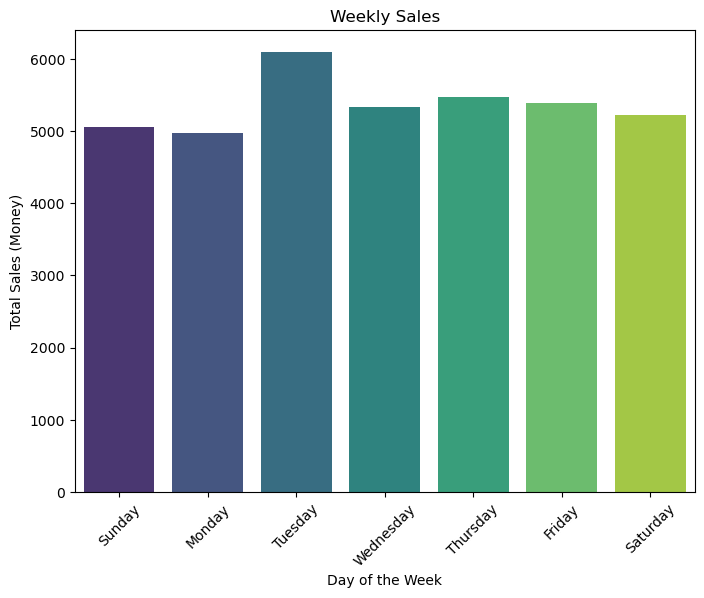

In [15]:
#Weekly Sales

# Grouping and summing the sales by day of the week
weekly_sales = df.groupby('day')['money'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='money', hue='day', data=weekly_sales, palette='viridis', dodge=False)
plt.title('Weekly Sales')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Money)')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
plt.show()



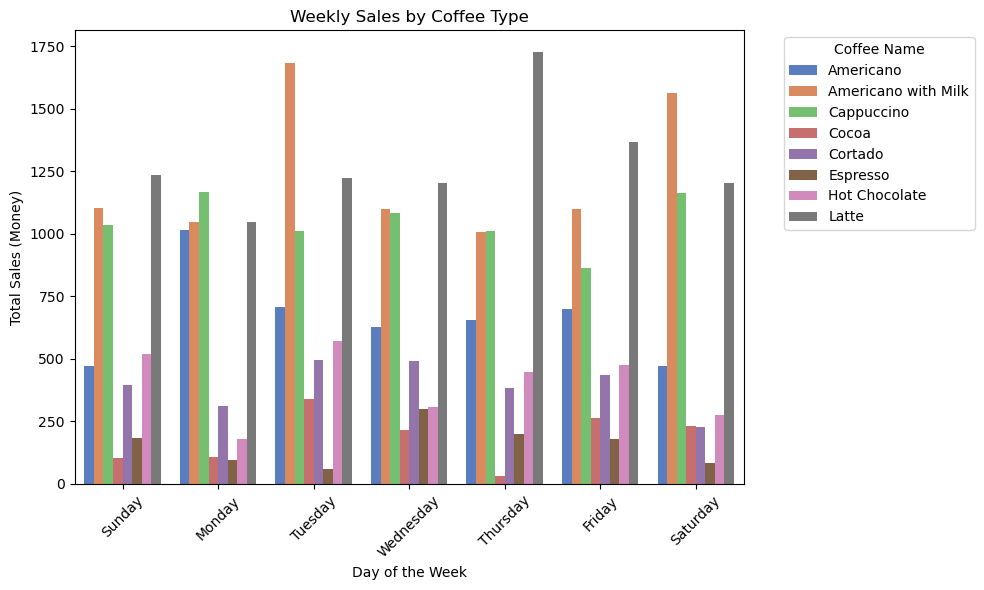

In [20]:
#Weekly Sales By Coffee_name

# Grouping and summing the sales by day of the week and coffee type
weekly_sales_coffee = df.groupby(['day', 'coffee_name'])['money'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='money', hue='coffee_name', data=weekly_sales_coffee, palette='muted')
plt.title('Weekly Sales by Coffee Type')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Money)')
plt.xticks(ticks=range(7), labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

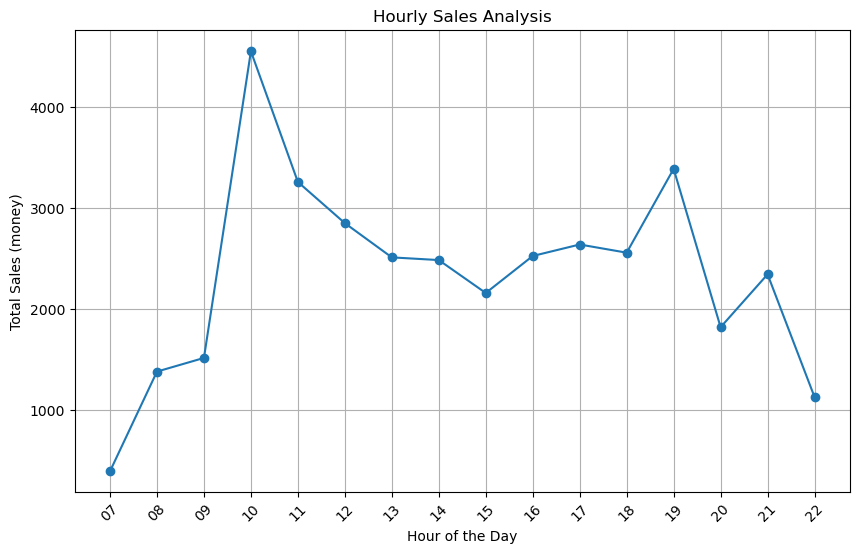

In [6]:
#Hourly Sales

# Grouping by 'hours' and summing up the 'money' column
hourly_sales = df.groupby('hour')['money'].sum().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales['hour'], hourly_sales['money'], marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (money)')
plt.title('Hourly Sales Analysis')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


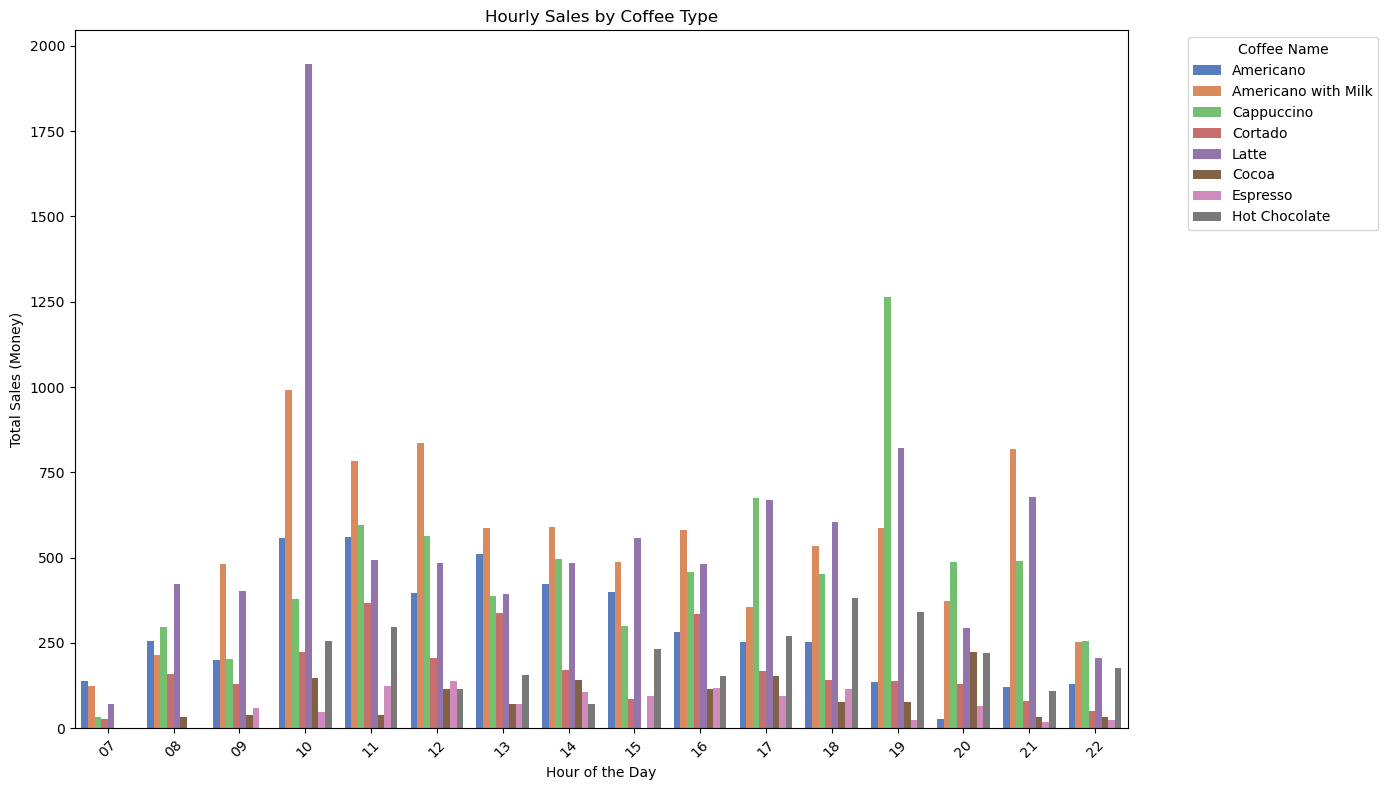

In [23]:
#Hourly Sales

# Grouping and summing the sales by hour and coffee type
hourly_sales_coffee = df.groupby(['hour', 'coffee_name'])['money'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(14, 8))
sns.barplot(x='hour', y='money', hue='coffee_name', data=hourly_sales_coffee, palette='muted')
plt.title('Hourly Sales by Coffee Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.legend(title='Coffee Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Mean Squared Error: 3.7085707306645466
R^2 Score: 0.8007908978542151


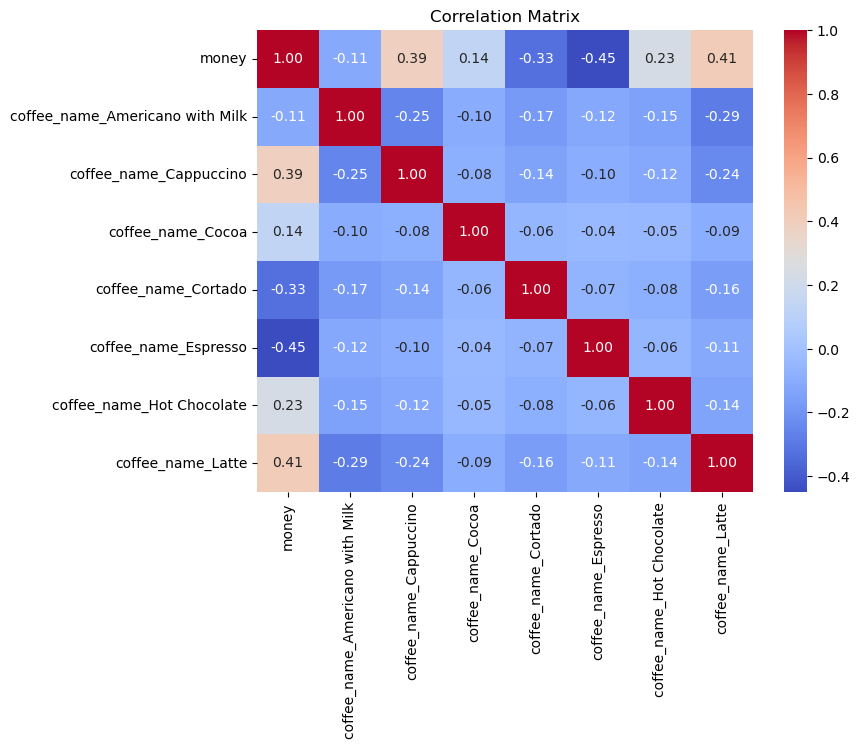

In [17]:
#Preparing the data for machine learning by handling categorical variables.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Encode the 'coffee_name' column numerically using one-hot encoding
df_encoded = pd.get_dummies(df[['money', 'coffee_name']], columns=['coffee_name'], drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('money', axis=1)
y = df_encoded['money']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2_score = model.score(X_test, y_test)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2_score}')

# Plot the correlation matrix for encoded data (previous code)
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Model Performance:

R² Score: The model has an R² score of 0.8008, indicating that it explains approximately 80% of the variability in sales (money). This is a strong performance for a linear regression model.

Mean Squared Error (MSE): The MSE of 3.7086 suggests that the model's predictions are fairly accurate, with the average squared difference between the predicted and actual sales being relatively 

Correltion Analysis
Insights:
1. Strong Positive Correlation: 
   Latte (0.41): Higher spending on Lattes.
   Cappuccino (0.39): Higher spending on Cappuccinos.
   Hot Chocolate (0.23): Some positive correlation.
2. Weak Positive Correlation:
   Cocoa (0.14): Slight positive correlation.
3. Negative Correlation:
   Espresso (-0.45): Higher spending associated with fewer Espresso purchases.
   Cortado (-0.33): Similar trend as Espresso.
   Americano with Milk (-0.11): Weak negative correlation.

 Recommendations:
1. Promote Lattes and Cappuccinos: Focus on promotions or loyalty programs to encourage higher spending.
2. Re-evaluate Espresso and Cortado: Make these more appealing, adjust prices for better profitability and offer them in combo deals.
3. Analyze Americano with Milk: Investigate pricing, marketing, and customer preferences.
4. Monitor Trends: Update and analyze correlation matrix regularly.
low.